In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline


In [135]:
from sklearn.cluster import KMeans
# from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [104]:
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/clean.pkl')

In [105]:
#drop these two columns because not useful right now
df.drop(['yr_born', 'yr_died'], axis=1, inplace=True)
#drop outliers
df = df.query('numlines < 500')
df = df.query('enj_score < 1400')
df = df.query('numstanzas < 100')
df = df.query('avgline_stanza < 150')
df = df.query('title_lesk_abs < 2.0')
df = df.query('conjunction_ratio < 100')

In [106]:
df.describe()

,yrpub,numlines,numstanzas,avgline_stanza,enj_score,ttr,abstraction_score,lesk_abs_score,pronoun_score,title_lesk_abs,conjunction_ratio,nps_ratio,vps_ratio,aps_ratio,avg_nps_cscore,avg_vps_cscore,avg_aps_cscore,1_w_nps_fr,2_w_nps_fr,3_w_nps_fr,4_w_nps_fr,5_w_nps_fr,6_w_nps_fr,7_w_nps_fr,8_w_nps_fr,9_w_nps_fr,10_w_nps_fr,11_w_nps_fr,12_w_nps_fr,13_w_nps_fr,14_w_nps_fr,15_w_nps_fr,16_w_nps_fr,label
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428,1428.000000,1428.000000,1428.000000
mean,1991.127451,31.945378,5.235994,14.899795,49.581985,0.688841,1.283921,1.149667,0.428676,1.240094,6.278567,0.521790,0.331054,0.147155,1.555614,1.998132,1.177705,0.605100,0.261746,0.114220,0.014292,0.002896,0.000881,0.000325,0.000239,0.000070,0.000116,0.000006,0.000078,0.000008,0,0.000016,0.000006,0.509804
std,29.659346,31.253510,8.369928,17.365631,125.862089,0.118392,0.158912,0.141538,0.732490,0.164475,9.960350,0.084558,0.086283,0.054893,0.216508,0.412874,0.194084,0.119607,0.100868,0.072419,0.024333,0.012282,0.007965,0.003042,0.003222,0.001383,0.002113,0.000232,0.002940,0.000308,0,0.000601,0.000232,0.500079
min,1909.000000,1.000000,1.000000,0.666667,1.125000,0.071429,0.500000,0.500000,0.000000,0.625000,0.000000,0.111111,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
25%,1988.000000,15.000000,1.000000,3.833333,6.000000,0.613102,1.177185,1.059349,0.068966,1.136364,2.000000,0.472222,0.278207,0.111111,1.421637,1.750000,1.000000,0.540326,0.201376,0.071115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
50%,2004.000000,24.000000,2.000000,8.000000,11.797436,0.696057,1.280269,1.150000,0.183502,1.240255,3.000000,0.520833,0.333333,0.142857,1.539841,1.968246,1.142857,0.605662,0.259259,0.108108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.000000
75%,2011.000000,38.000000,6.000000,20.000000,36.000000,0.764834,1.385397,1.234960,0.400000,1.333333,5.600000,0.565360,0.380952,0.179140,1.662990,2.200000,1.250000,0.678929,0.316678,0.151515,0.022990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.000000
max,2015.000000,453.000000,91.000000,146.000000,1336.000000,1.000000,2.000000,1.650000,6.000000,1.800000,97.000000,1.000000,0.666667,0.363636,3.476744,6.500000,3.000000,1.000000,1.000000,0.666667,0.200000,0.250000,0.200000,0.047619,0.076923,0.037037,0.052632,0.008772,0.111111,0.011628,0,0.022727,0.008772,1.000000


In [107]:
# metrics.silhouette_score(X, labels, metric='euclidean')
X = df.ix[:, :-1]
for k in xrange(2,12):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.876861257253
3 0.609889998362
4 0.490101040705
5 0.425307691662
6 0.452721109791
7 0.452149412578
8 0.458391446837
9 0.398614832963
10 0.444104160492
11 0.353723293925


In [108]:
# km = KMeans(n_clusters=2,  init='random', n_init=1 , max_iter = 100, random_state=1)
km = KMeans(n_clusters=2, init='k-means++', n_init=10 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
# centroids
y = km.predict(X)
print y
# y
# plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
centroids = km.cluster_centers_
print centroids

# plt.scatter(centroids[:,0], centroids[:,1],s=100,c=np.unique(Y_hat))

[0 0 0 ..., 0 0 1]
[[  1.99066905e+03   3.20974212e+01   5.33309456e+00   1.46611082e+01
    3.32799248e+01   6.87153617e-01   1.28491469e+00   1.14990609e+00
    3.98173340e-01   1.23894729e+00   5.96568334e+00   5.21929078e-01
    3.31274834e-01   1.46796088e-01   1.55081601e+00   1.99181698e+00
    1.17675068e+00   6.07028123e-01   2.61457744e-01   1.13121812e-01
    1.39461917e-02   2.83673634e-03   8.54914980e-04   2.83704306e-04
    2.28524783e-04   5.57569560e-05   8.60030983e-05   6.28361735e-06
    7.95924865e-05   8.32944626e-06   0.00000000e+00   2.71050543e-20
    6.28361735e-06]
 [  2.01112500e+03   2.53125000e+01   1.00000000e+00   2.53125000e+01
    7.60759375e+02   7.62450954e-01   1.24056237e+00   1.13925150e+00
    1.75937500e+00   1.29013836e+00   1.99281250e+01   5.15742637e-01
    3.21431061e-01   1.62826302e-01   1.76490549e+00   2.27360451e+00
    1.21933079e+00   5.20993711e-01   2.74313947e-01   1.62126775e-01
    2.93913307e-02   5.46286615e-03   2.02955178e-0

In [109]:
Y_hat

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# cleandf.dropna(inplace = True)
# X.columns
# plt.jet()
# plt.scatter(X.abstraction_score, X.pronoun_score, c=Y_hat, alpha=0.4)
# centroids = km.cluster_centers_
# plt.scatter(centroids[:,0], centroids[:,1],s=100,c=np.unique(Y_hat))

In [186]:
# df.label.value_counts()
df.columns[:-1]

# df.drop('')

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'4_w_nps_fr',
       u'5_w_nps_fr', u'6_w_nps_fr', u'7_w_nps_fr', u'8_w_nps_fr',
       u'9_w_nps_fr', u'10_w_nps_fr', u'11_w_nps_fr', u'12_w_nps_fr',
       u'13_w_nps_fr', u'14_w_nps_fr', u'15_w_nps_fr', u'16_w_nps_fr'],
      dtype='object')

In [187]:
numerical_features = df.get(df.columns[:-1]) 
features_array = numerical_features
target = df.label.values
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.30, random_state=0)

In [188]:
# train logistic regression, evaluate on test
lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)
    
#clf = train_test(data_out)
target_predicted = lr.predict(features_test)

print("Train Testing Results \n\n")

print(classification_report(target_test, target_predicted,
                         target_names=['not contemp', 'contemp']))

Train Testing Results 


             precision    recall  f1-score   support

not contemp       0.68      0.55      0.61       217
    contemp       0.62      0.74      0.67       212

avg / total       0.65      0.64      0.64       429



In [189]:
proba_lr = lr.predict_proba(features_test)

print proba_lr[:5]

[[ 0.32718093  0.67281907]
 [ 0.43789886  0.56210114]
 [ 0.28610729  0.71389271]
 [ 0.42856422  0.57143578]
 [ 0.32889039  0.67110961]]


In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

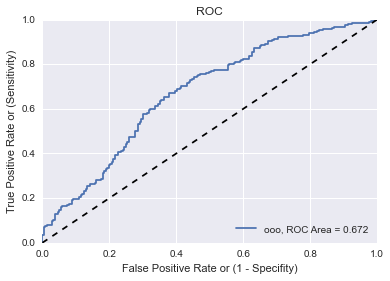

In [191]:
plot_roc_curve(target_test, proba_lr, "ooo")

In [127]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(features_train, target_train)
preds = nb.predict(features_test)
preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [128]:
print metrics.accuracy_score(target_test, preds)
print metrics.confusion_matrix(target_test, preds)

0.536130536131
[[166  51]
 [148  64]]


#Let's try running a decision tree classifier and seeing if that is better than logistic regression

In [157]:
featurecols = ['numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1_w_nps_fr','2_w_nps_fr','3_w_nps_fr','4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr',
             '8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr','13_w_nps_fr', '14_w_nps_fr',
             '15_w_nps_fr','16_w_nps_fr'
            ]

In [158]:
X = df[featurecols]
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)
 
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train) 
preds = treeclf.predict(X_test)

In [159]:
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.5337995338
[[133  74]
 [126  96]]


In [160]:
# compute the feature importances
pd.DataFrame({'feature':featurecols, 'importance':treeclf.feature_importances_}).sort('importance', ascending = False)

,feature,importance
9,conjunction_ratio,0.240435
7,pronoun_score,0.179870
3,enj_score,0.142385
12,aps_ratio,0.136939
13,avg_nps_cscore,0.107043
11,vps_ratio,0.101595
5,abstraction_score,0.091732
22,7_w_nps_fr,0.000000
23,8_w_nps_fr,0.000000
24,9_w_nps_fr,0.000000
